In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruits/fruits-360/LICENSE
/kaggle/input/fruits/fruits-360/readme.md
/kaggle/input/fruits/fruits-360/papers/fruit_recognition_deep_learning.pdf
/kaggle/input/fruits/fruits-360/Training/Quince/r_305_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/139_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/128_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/r_239_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/185_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/r_199_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/r_287_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/73_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/191_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/r_306_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/112_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/r_250_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/r_186

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from PIL import Image 
from glob import glob

In [3]:
train_path = '../input/fruits/fruits-360/Training/'
test_path = '../input/fruits/fruits-360/Test/'

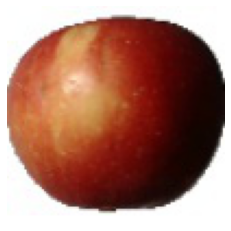

In [4]:
img = load_img(train_path + "Apple Braeburn/0_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()


In [5]:
images = ['Orange', 'Banana', 'Cauliflower', 'Cactus fruit', 'Eggplant', 'Avocado', 'Blueberry','Lemon', 'Kiwi']


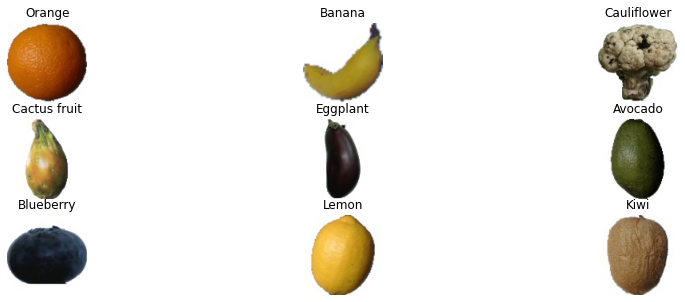

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize =(15,5))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    #fig.patch.set_facecolor('#E53090')
    #Above code adds a background color for subplots you can change the hex color code as you wish
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + images[i] +"/0_100.jpg", target_size=(100,100)))

In [7]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [8]:
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

131


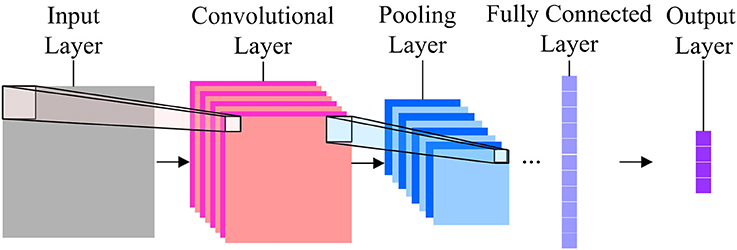

# Cnn Model

In [9]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape= x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))#output
model.add(Activation("softmax"))


In [10]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        1

In [12]:
batch_size = 32

# Data Augmentation

* rescale ----> rescaling factor. Defaults to None.
* shear_range ----> 'Shear' means that the image will be distorted along an axis, mostly to create or rectify the perception angles.
* horizontal_flip ----> Boolean. Randomly flip inputs horizontally.
* vertical_flip ----> Boolean. Randomly flip inputs vertically.
* zoom_range ----> Float or [lower, upper]. Range for random zoom

OTHER FUNCTIONS OF ImageDataGenerator

* featurewise_center: Boolean. Set input mean to 0 over the dataset, feature-wise.
* samplewise_center: Boolean. Set each sample mean to 0.
* featurewise_std_normalization: Boolean. Divide inputs by std of the dataset, feature-wise.
* samplewise_std_normalization: Boolean. Divide each input by its std.
* zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
* zca_whitening: Boolean. Apply ZCA whitening.
* rotation_range: Int. Degree range for random rotations.
width_shift_range: 
height_shift_range: 
* brightness_range: Tuple or list of two floats. Range for picking a brightness shift value from.
* channel_shift_range: Float. Range for random channel shifts.
* fill_mode: One of {"constant", "nearest", "reflect" or "wrap"}. Default is 'nearest'.
* cval: Float or Int. Value used for points outside the boundaries when fill_mode = "constant".
* validation_split: Float. Fraction of images reserved for validation (strictly between 0 and 1).
* dtype: Dtype to use for the generated arrays.
* preprocessing_function: function that will be applied on each input. 
* data_format: Image data format, either "channels_first" or "channels_last".


Source: https://keras.io/api/preprocessing/image/

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [14]:
hist = model.fit_generator(generator = train_generator, 
                   steps_per_epoch = 1600 // batch_size,
                   epochs = 50,
                   validation_data = test_generator,
                   validation_steps = 800 // batch_size)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
50/50 [==============================] - 19s 315ms/step - loss: 4.8233 - accuracy: 0.0225 - val_loss: 4.0985 - val_accuracy: 0.0850
Epoch 2/50
50/50 [==============================] - 14s 283ms/step - loss: 4.0183 - accuracy: 0.0887 - val_loss: 3.3027 - val_accuracy: 0.2163
Epoch 3/50
50/50 [==============================] - 14s 284ms/step - loss: 3.2585 - accuracy: 0.2008 - val_loss: 2.5429 - val_accuracy: 0.3388
Epoch 4/50
50/50 [==============================] - 14s 273ms/step - loss: 2.6680 - accuracy: 0.2962 - val_loss: 1.8396 - val_accuracy: 0.5063
Epoch 5/50
50/50 [==============================] - 14s 277ms/step - loss: 2.2155 - accuracy: 0.3715 - val_loss: 1.5624 - val_accuracy: 0.5625
Epoch 6/50
50/50 [==============================] - 13s 263ms/step - loss: 1.8925 - accuracy: 0.4461 - val_loss: 1.2678 - val_accuracy: 0.6550
Epoch 7/50
50/50 [==============================] - 13s 263ms/step - loss: 1.6152 - accuracy: 0.5094 - val_loss: 0.9731 - val_accuracy: 0.7437

In [15]:
#model.save_weights("example.h5")

In [16]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Train-Validation Loss

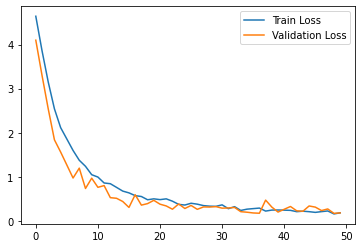

In [17]:
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

# Train-Validation Accuracy

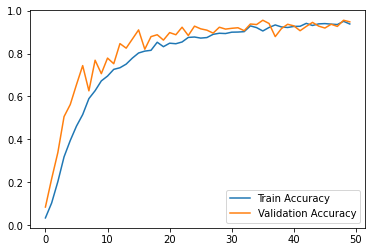

In [18]:
plt.plot(hist.history["accuracy"], label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

# Thank you for reading


# If you enjoyed my work, please consider upvoting


# More of my work:

**Stroke EDA and Classification(%94.60 Accuracy)**

- https://www.kaggle.com/umutalpaydn/stroke-eda-and-classification-94-60-accuracy

**Heart-Disease Analysis & Classification**

- https://www.kaggle.com/umutalpaydn/heart-disease-analysis-classification

**VideoGameSales EDA**

- https://www.kaggle.com/umutalpaydn/videogamesales-eda

**Iris Classification KNN & Logistic Regression**

- https://www.kaggle.com/umutalpaydn/iris-classification-knn-logistic-regression

